In [1]:
%run startup.py

%matplotlib inline

%run lib/load_uci.py

# Use custom built LikeFeatures to select features by correlation

## Sample 1

In [2]:
lf = LikeFeatures(X_tr_1, y_tr_1)

In [3]:
lf.find_corrs()

In [4]:
lf.find_bins()

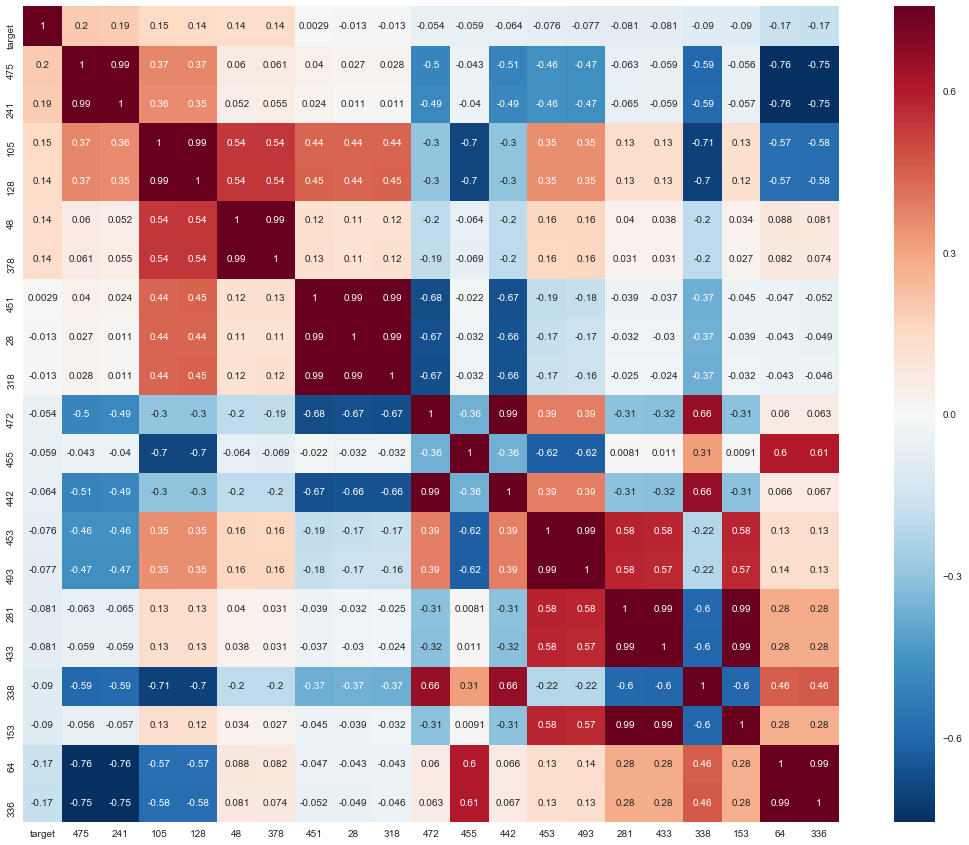

In [5]:
lf.corr_heatmap()

In [6]:
lf.top_corrs

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

In [7]:
lf.feature_bins

{0: (28, 318, 451),
 1: (442, 472),
 2: (105, 128),
 3: (453, 493),
 4: (64, 336),
 5: (48, 378),
 6: (455,),
 7: (338,),
 8: (153, 281, 433),
 9: (241, 475)}

## Sample 2

In [8]:
lf = LikeFeatures(X_tr_2, y_tr_2)

In [9]:
lf.find_corrs()

In [10]:
lf.find_bins()

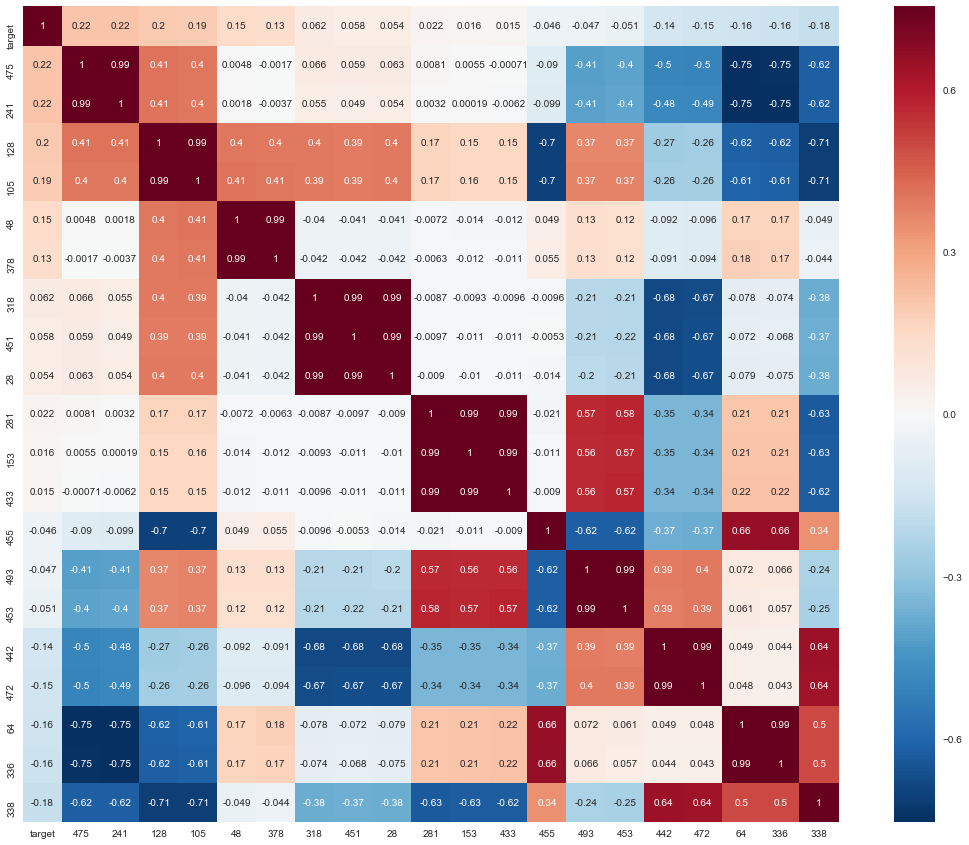

In [11]:
lf.corr_heatmap()

In [13]:
lf.top_corrs

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

In [14]:
lf.feature_bins

{0: (28, 318, 451),
 1: (442, 472),
 2: (105, 128),
 3: (453, 493),
 4: (64, 336),
 5: (48, 378),
 6: (455,),
 7: (338,),
 8: (153, 281, 433),
 9: (241, 475)}

## Sample 3

In [15]:
lf = LikeFeatures(X_tr_3, y_tr_3)

In [16]:
lf.find_corrs()

In [17]:
lf.find_bins()

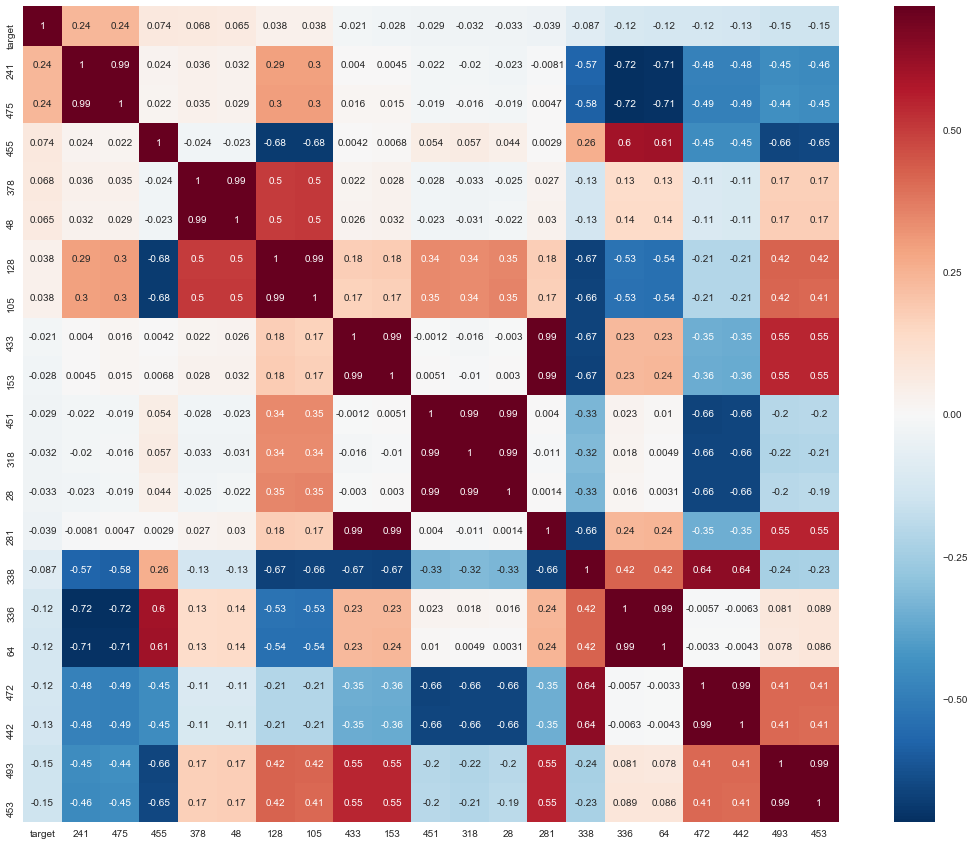

In [18]:
lf.corr_heatmap()

In [19]:
lf.top_corrs

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

In [20]:
lf.feature_bins

{0: (28, 318, 451),
 1: (442, 472),
 2: (105, 128),
 3: (453, 493),
 4: (64, 336),
 5: (48, 378),
 6: (455,),
 7: (338,),
 8: (153, 281, 433),
 9: (241, 475)}

## Full Training Set

In [12]:
lf = LikeFeatures(X_train, y_train)

In [13]:
lf.find_corrs()

In [14]:
lf.find_bins()

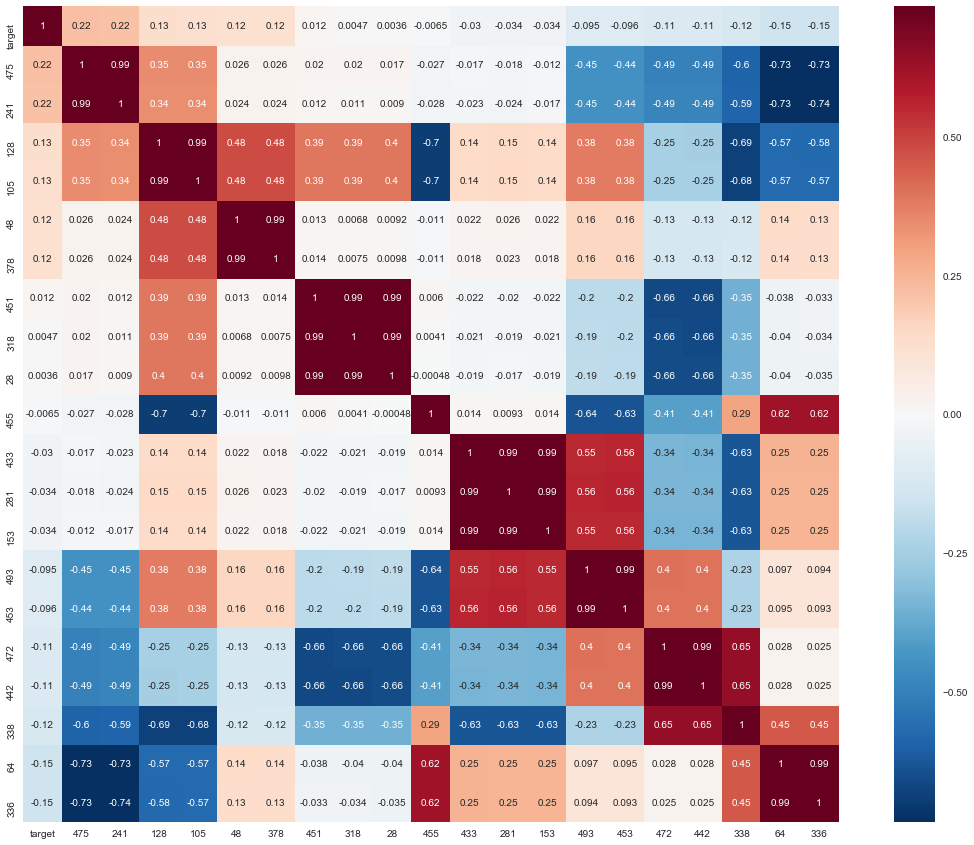

In [15]:
lf.corr_heatmap()

In [16]:
lf.top_corrs

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

In [17]:
lf.feature_bins

{0: (28, 318, 451),
 1: (442, 472),
 2: (105, 128),
 3: (453, 493),
 4: (64, 336),
 5: (48, 378),
 6: (455,),
 7: (338,),
 8: (153, 281, 433),
 9: (241, 475)}

# SelectKBest for comparison

In [18]:
from sklearn.feature_selection import SelectKBest

In [19]:
skb = SelectKBest(k=20)

In [20]:
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_classif at 0x113b2d8c8>)

In [21]:
X_train.columns[skb.get_support()]

Int64Index([ 48,  64, 105, 128, 205, 241, 282, 296, 323, 336, 338, 378, 411,
            424, 442, 453, 472, 475, 493, 496],
           dtype='int64')

In [22]:
for feature in X_train.columns[skb.get_support()]:
    print('{} in top_corrs: {}'.format(feature, feature in lf.top_corrs))

48 in top_corrs: True
64 in top_corrs: True
105 in top_corrs: True
128 in top_corrs: True
205 in top_corrs: False
241 in top_corrs: True
282 in top_corrs: False
296 in top_corrs: False
323 in top_corrs: False
336 in top_corrs: True
338 in top_corrs: True
378 in top_corrs: True
411 in top_corrs: False
424 in top_corrs: False
442 in top_corrs: True
453 in top_corrs: True
472 in top_corrs: True
475 in top_corrs: True
493 in top_corrs: True
496 in top_corrs: False


# SelectFromModel with DecisionTreeClassifier

DecisionTreeClassifier provided the best scores in the benchmark, so used here to try to select best 20 features.

In [23]:
from sklearn.feature_selection import SelectFromModel

In [24]:
sfm = SelectFromModel(DecisionTreeClassifier())

In [25]:
scaler = StandardScaler()

In [26]:
X_train_sc = scaler.fit_transform(X_train)

In [27]:
sfm.fit(X_train_sc, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
        prefit=False, threshold=None)

In [28]:
sum(sfm.get_support())

86

In [29]:
X_train.columns[sfm.get_support()]

Int64Index([  4,   6,  16,  17,  28,  31,  48,  56,  64,  72,  82,  83,  92,
             99, 102, 105, 106, 107, 108, 109, 110, 118, 122, 123, 124, 126,
            128, 135, 141, 144, 147, 153, 169, 177, 180, 183, 187, 199, 200,
            216, 230, 233, 241, 250, 260, 262, 270, 275, 281, 285, 296, 308,
            312, 316, 318, 321, 322, 325, 326, 336, 337, 338, 349, 352, 365,
            378, 380, 382, 389, 403, 407, 415, 419, 431, 441, 442, 450, 451,
            453, 457, 472, 475, 478, 488, 490, 493],
           dtype='int64')

In [36]:
for feature in X_train.columns[sfm.get_support()]:
    print('{} in top_corrs: {}'.format(feature, feature in lf.top_corrs))

2 in top_corrs: False
4 in top_corrs: False
6 in top_corrs: False
16 in top_corrs: False
17 in top_corrs: False
28 in top_corrs: True
48 in top_corrs: True
56 in top_corrs: False
58 in top_corrs: False
63 in top_corrs: False
64 in top_corrs: True
82 in top_corrs: False
83 in top_corrs: False
86 in top_corrs: False
92 in top_corrs: False
99 in top_corrs: False
105 in top_corrs: True
106 in top_corrs: False
107 in top_corrs: False
108 in top_corrs: False
109 in top_corrs: False
110 in top_corrs: False
112 in top_corrs: False
118 in top_corrs: False
123 in top_corrs: False
124 in top_corrs: False
126 in top_corrs: False
128 in top_corrs: True
130 in top_corrs: False
134 in top_corrs: False
135 in top_corrs: False
136 in top_corrs: False
144 in top_corrs: False
147 in top_corrs: False
153 in top_corrs: True
167 in top_corrs: False
169 in top_corrs: False
180 in top_corrs: False
184 in top_corrs: False
187 in top_corrs: False
199 in top_corrs: False
200 in top_corrs: False
207 in top_corrs:

# Overlap from SelectKBest and SelectFromModel

In [31]:
both_sets = []
for feature in X_train.columns[sfm.get_support()]:
    if feature in X_train.columns[skb.get_support()]:
        both_sets.append(feature)

In [37]:
for feature in both_sets:
    print('{} in top_corrs: {}'.format(feature, feature in lf.top_corrs))

48 in top_corrs: True
64 in top_corrs: True
105 in top_corrs: True
128 in top_corrs: True
241 in top_corrs: True
296 in top_corrs: False
336 in top_corrs: True
338 in top_corrs: True
378 in top_corrs: True
442 in top_corrs: True
453 in top_corrs: True
472 in top_corrs: True
475 in top_corrs: True
493 in top_corrs: True


In [39]:
lf.feature_bins

{0: (28, 318, 451),
 1: (442, 472),
 2: (105, 128),
 3: (453, 493),
 4: (64, 336),
 5: (48, 378),
 6: (455,),
 7: (338,),
 8: (153, 281, 433),
 9: (241, 475)}

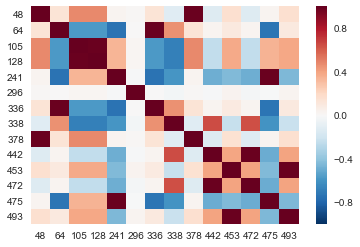

In [38]:
sns.heatmap(X_train[both_sets].corr())